In [2]:
!pip install qiskit
!pip install qiskit-nature[pyscf] -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 12.4 MB/s eta 0:00:00


In [3]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
import numpy as np
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SLSQP,CG,SPSA,AQGD
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

In [4]:
distances = []
vqe_cg_energies = []
vqe_spsa_energies = []
vqe_aqgd_energies = []
exact_energy = []

for coordinate in np.arange(0.3, 4.0, 0.05):
    dist = "H 0 0 0; H 0 0 {}"

    driver = PySCFDriver(
        atom= dist.format(coordinate),
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    es_problem = driver.run()
    converter = QubitConverter(JordanWignerMapper())

    vqe_solver = VQEUCCFactory(Estimator(), UCCSD(), CG())
    calc = GroundStateEigensolver(converter, vqe_solver)
    res = calc.solve(es_problem)
    vqe_cg_energies.append(res.total_energies[0])
    
    vqe_solver_spsa = VQEUCCFactory(Estimator(), UCCSD(), SPSA())
    calc_spsa = GroundStateEigensolver(converter, vqe_solver_spsa)
    res_spsa = calc_spsa.solve(es_problem)
    vqe_spsa_energies.append(res_spsa.total_energies[0])
    
    vqe_solver_aqgd = VQEUCCFactory(Estimator(), UCCSD(), AQGD())
    calc_aqgd = GroundStateEigensolver(converter, vqe_solver_aqgd)
    res_aqgd = calc_aqgd.solve(es_problem)
    vqe_aqgd_energies.append(res_aqgd.total_energies[0])
    
    numpy_solver = NumPyMinimumEigensolver()
    calc = GroundStateEigensolver(converter, numpy_solver)
    res_exact = calc.solve(es_problem)
    exact_energy.append(res_exact.total_energies[0])


    distances.append(coordinate)


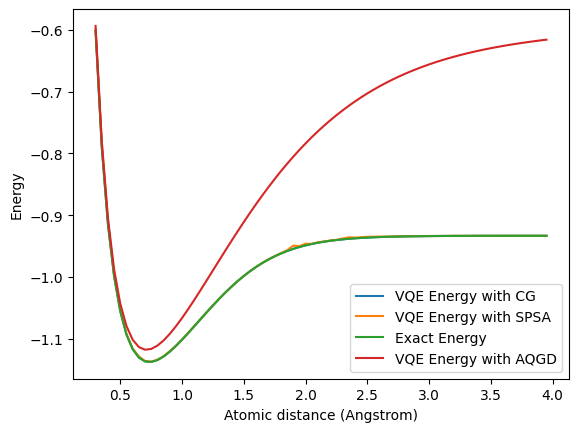

In [5]:
import matplotlib.pyplot as plt
plt.plot(distances, vqe_cg_energies, label="VQE Energy with CG")
plt.plot(distances, vqe_spsa_energies, label="VQE Energy with SPSA")
plt.plot(distances, exact_energy, label="Exact Energy")
plt.plot(distances, vqe_aqgd_energies, label="VQE Energy with AQGD")
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()